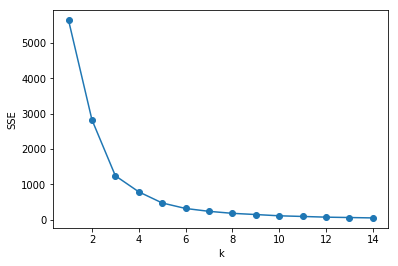

In [7]:
# -*- coding: utf-8 -*-
from pyhive import hive

HOST = "192.168.12.5"
PORT = 10000
NAME = "root"
PASSWORD = "5606603"
DATABASE="behavior_labels"
conn = hive.Connection(host=HOST, port=PORT, username=NAME, password=PASSWORD, auth="LDAP", database=DATABASE)

cursor = conn.cursor()
sql = "SELECT  score from dw_vip_scores where subject = 3"
cursor.execute(sql)
data=[]
for result in cursor.fetchall():
    data.append(result)
    
    
import pandas as pd
data=pd.DataFrame(data)  
data=data.drop_duplicates()

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 划分聚类
# SSE轴图
SSE = []
for k in range(1, 15):
    estimator = KMeans(n_clusters=k, n_jobs=1, n_init=10, max_iter=300)
    estimator.fit(data)
    SSE.append(estimator.inertia_)
X = range(1, 15)
plt.xlabel("k")
plt.ylabel("SSE")
plt.plot(X, SSE, "o-")
plt.savefig("/home/messi/paints/Interactive-K.png", format="png")
plt.show()

In [22]:
data.describe()

,0
count,556.000000
mean,4.433201
std,3.187968
min,1.040000
25%,2.427500
50%,3.815000
75%,5.472500
max,34.110000


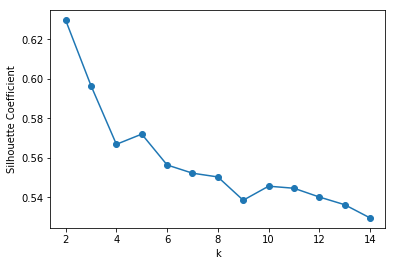

In [8]:
# 轮廓系数
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

from sklearn.metrics import silhouette_score
Scores = []
for k in range(2, 15):
    estimator = KMeans(n_clusters=k, n_jobs=1, n_init=10, max_iter=300)
    estimator.fit(data)
    Scores.append(silhouette_score(data, estimator.labels_, metric="euclidean"))
X = range(2, 15)
plt.xlabel("k")
plt.ylabel("Silhouette Coefficient")
plt.plot(X, Scores, "o-")
plt.savefig("/home/messi/paints/InteractiveLunKuo.png", format="png")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85de8805d0>]],
      dtype=object)

<Figure size 2160x2160 with 0 Axes>

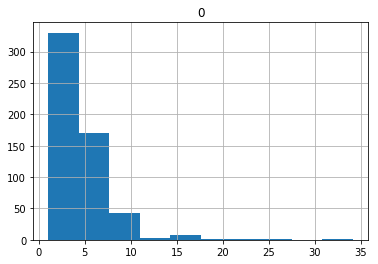

In [9]:
# 查看数据分布图
import numpy as np
plt.figure(figsize=(30, 30))
data.hist()

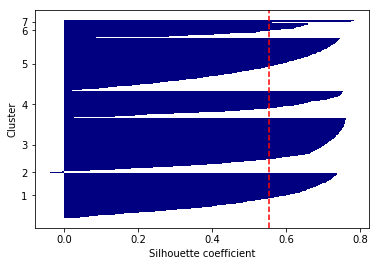

In [16]:
# -*- coding: utf-8 -*-
# 轮廓系数图

from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

km = KMeans(n_clusters=7, n_init=10, n_jobs=1, max_iter=300)
y_km = km.fit_predict(data)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data, y_km, metric="euclidean")  #minkowski,  euclidean, backend="threading"
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="None", color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.savefig("/home/messi/paints/SilhouetteInteractive.png", format="png")
plt.show()

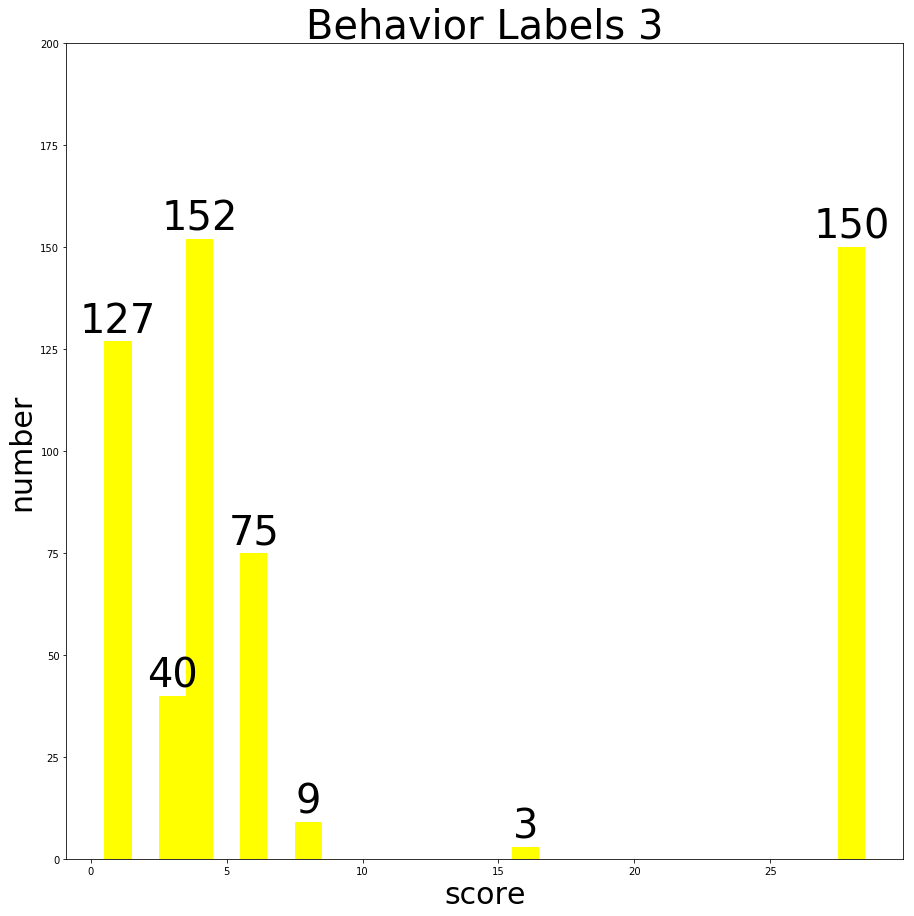

In [21]:
center = km.cluster_centers_
labels = km.labels_

n = pd.Series(labels).value_counts()
number = n.values

score = []
for i in range(len(center)):
    score.append(int(center[i][0]))
score

plt.figure(figsize=(15, 15))
plt.bar(score, number, 1, label="score-number", color="yellow")
plt.ylabel("number", fontsize=30)
plt.xlabel("score", fontsize=30)
plt.title("Behavior Labels 3", fontsize=40)
plt.savefig("/home/messi/paints/Interactive.png", format="png")

for a,b in zip(score, number):
    plt.text(a, b + 0.05, "%.0f" % b, ha="center", va ="bottom", fontsize=40)
plt.ylim(0, 200)

plt.show()